In [2]:
import pandas as pd

In [3]:
cr = pd.read_csv(r"D:\Datasets\CreditRisk.csv")

In [4]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#  PS1 :   build the predictive model which can be used by the bank to approve or reject the loan( Loan_status)
#  PS2 :   use the model to run a campign for targeting the good customers ( you may wish to offer new loans) 

In [6]:
# data cleaning

In [7]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
cr.Gender              = cr.Gender.fillna('Male')
cr.Married             = cr.Married .fillna('No')
cr.Dependents          = cr.Dependents.fillna(0)
cr.Self_Employed       = cr.Self_Employed .fillna('No')
cr.LoanAmount          = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term    = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History      = cr.Credit_History.fillna(0)

In [9]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [10]:
cr  = cr.drop(['Loan_ID'], axis = 1)

In [11]:
cr.Gender  = cr.Gender.replace({'Male': 1, 'Female': 0})
cr.Married  = cr.Married.replace({'Yes' : 1, 'No':0 })
cr.Education  = cr.Education.replace({'Graduate':1 , 'Not Graduate': 0})
cr.Self_Employed  = cr.Self_Employed.replace({'Yes' : 1, 'No':0 })
cr.Property_Area  =cr.Property_Area .replace({'Rural':0 , 'Semiurban': 1 , 'Urban': 2})
cr.Loan_Status   = cr.Loan_Status.replace({ 'Y': 1 , 'N': 0})

In [12]:
from sklearn.model_selection  import train_test_split

cr_train , cr_test = train_test_split(cr , test_size=  .2)

In [13]:
cr_train_x   =   cr_train.iloc[: , 0:-1]
cr_train_y   = cr_train.iloc[: , -1]

cr_test_x  =    cr_test.iloc[: , 0:-1]
cr_test_y  =   cr_test.iloc[: , -1]

In [14]:
#  model building

In [15]:
from  sklearn.linear_model  import LogisticRegression
glm  = LogisticRegression()

In [16]:
glm.fit(cr_train_x , cr_train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
pred_cr = glm.predict(cr_test_x)
pred_cr

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [18]:
from sklearn.metrics  import confusion_matrix

In [19]:
tab_cr  = confusion_matrix(cr_test_y , pred_cr)
tab_cr

array([[ 33,  24],
       [ 10, 130]], dtype=int64)

In [20]:
 tab_cr.diagonal().sum()  * 100/ tab_cr.sum()

82.74111675126903

In [21]:
from sklearn.metrics  import accuracy_score

In [22]:
accuracy_score(cr_test_y , pred_cr)

0.8274111675126904

In [23]:
from sklearn.metrics  import precision_score

In [24]:
135 / ( 135 +28)

0.8282208588957055

In [25]:
precision_score(cr_test_y , pred_cr)

0.8441558441558441

In [26]:
t

In [27]:
135 / ( 135 + 9)

0.9375

In [28]:
recall_score(cr_test_y , pred_cr)

0.9285714285714286

In [29]:
from sklearn.metrics  import f1_score

In [30]:
f1_score(cr_test_y , pred_cr)

0.8843537414965986

In [31]:
 2* .8282208588957055  *  .9375  / ( .8282208588957055  + .9375)

0.8794788273615635

In [32]:
glm.predict_proba(cr_test_x)

array([[0.10199108, 0.89800892],
       [0.08765138, 0.91234862],
       [0.23228548, 0.76771452],
       [0.113673  , 0.886327  ],
       [0.26507669, 0.73492331],
       [0.07249055, 0.92750945],
       [0.50214974, 0.49785026],
       [0.15650107, 0.84349893],
       [0.15148732, 0.84851268],
       [0.18142041, 0.81857959],
       [0.1639208 , 0.8360792 ],
       [0.04262427, 0.95737573],
       [0.509054  , 0.490946  ],
       [0.50752443, 0.49247557],
       [0.10191381, 0.89808619],
       [0.14400731, 0.85599269],
       [0.86438879, 0.13561121],
       [0.36266963, 0.63733037],
       [0.20858991, 0.79141009],
       [0.66949002, 0.33050998],
       [0.16213612, 0.83786388],
       [0.14084663, 0.85915337],
       [0.61122296, 0.38877704],
       [0.09053649, 0.90946351],
       [0.66518292, 0.33481708],
       [0.16173585, 0.83826415],
       [0.0579809 , 0.9420191 ],
       [0.30355225, 0.69644775],
       [0.17014099, 0.82985901],
       [0.3388535 , 0.6611465 ],
       [0.

In [33]:
len(glm.predict_proba(cr_test_x))

197

In [34]:
cr_test_x.shape

(197, 11)

In [35]:
.50830073 + 0.49169927

1.0

In [36]:
.57762386 +0.42237614

1.0

In [37]:
pred_cr = glm.predict(cr_test_x)  # preiction in classes
#pred_cr

In [38]:
pred_prob =glm.predict_proba(cr_test_x)
#pred_prob

In [39]:
#pred_prob[: , 1]

In [40]:
from sklearn.metrics   import  roc_auc_score
from sklearn.metrics   import  roc_curve

In [41]:
roc_auc_score(cr_test_y, pred_cr)  # area under the curve value 

0.7537593984962406

In [42]:
 fpr , tpr ,threshold  = roc_curve(cr_test_y  , pred_prob[: , 1])

In [43]:
#fpr

In [44]:
#tpr

In [45]:
import matplotlib.pyplot  as plt

In [46]:
Area = roc_auc_score(cr_test_y, pred_cr)
Area 

0.7537593984962406

In [47]:
import numpy as np
Area = np.round(Area, 3)

Text(0.5, 0.4, '0.754')

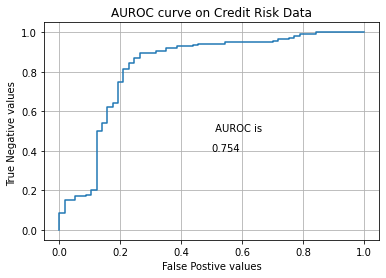

In [48]:
plt.plot(fpr, tpr )
plt.xlabel("False Postive values")
plt.ylabel("True Negative values ")
plt.title("AUROC curve on Credit Risk Data")
plt.grid()
plt.text(x = .5 , y = .5 , s =" AUROC is ")
plt.text(x = .5 , y = .4 , s = Area)

In [49]:
#  problems statemet 2

In [50]:
pred_prob_full  = glm.predict_proba(cr.iloc[: , 0: -1])

In [51]:
pred_prob_full  = pd.DataFrame(pred_prob_full)

In [52]:
pred_prob_full  = pred_prob_full.rename(columns= {pred_prob_full.columns[0]  :'Prob0'  , 
                                                  pred_prob_full.columns[1]  : 'Prob1'})

In [54]:
cr = pd.read_csv(r"D:\Datasets\CreditRisk.csv")
cr.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [55]:
pred_prob_full['LoanIdCustomer']   = cr.Loan_ID

In [56]:
pred_prob_full.head()

,Prob0,Prob1,LoanIdCustomer
0,0.116293,0.883707,LP001002
1,0.203437,0.796563,LP001003
2,0.069636,0.930364,LP001005
3,0.121817,0.878183,LP001006
4,0.115683,0.884317,LP001008


In [57]:
pred_prob_full  =   pred_prob_full.sort_values('Prob1', ascending= False)
pred_prob_full

,Prob0,Prob1,LoanIdCustomer
333,0.032330,0.967670,LP002101
164,0.037380,0.962620,LP001572
686,0.037958,0.962042,LP001375
14,0.042624,0.957376,LP001030
575,0.042738,0.957262,LP002868
...,...,...,...
696,0.814743,0.185257,LP001445
177,0.846783,0.153217,LP001610
925,0.861022,0.138978,LP002747
639,0.864389,0.135611,LP001153
